# U.S. Medical Insurance Costs

The project starts off with a .csv that contains insurance cost data for the US. There are 1338 entries in the .csv, each one with an age, BMI, gender, region of the US, smoking status and insurance costs. Let's first import the csv and see the range for each of these categories.

In [2]:
import csv

with open('insurance.csv', newline='') as insurancecsv: 
    insurance_data = csv.DictReader(insurancecsv)
    data = list(insurance_data)

Now that we've imported the CSV and we've structured it as a list, we can access each column and row using indexes, and even use the name of each column. Let's find calculate some basic information about the data set we have.

In [3]:
print("The data set has", len(data), "entries in it.")

ages = [row["age"] for row in data]
print("Age of people in the data set is ", min(ages),"-",max(ages))

bmis = [float(row["bmi"]) for row in data]
print("BMI range in the data set is ", min(bmis),"-",max(bmis))

children = [row["children"] for row in data]
print("Number of children range in the data set is ", min(children), "-", max(children))

costs = [float(row["charges"]) for row in data]
print("Insurance costs range in the data set is", min(costs), "-", max(costs))

The data set has 1338 entries in it.
Age of people in the data set is  18 - 64
BMI range in the data set is  15.96 - 53.13
Number of children range in the data set is  0 - 5
Insurance costs range in the data set is 1121.8739 - 63770.42801


Let's see if we can plot the distrubtion of these items. Here's the distribution for age.

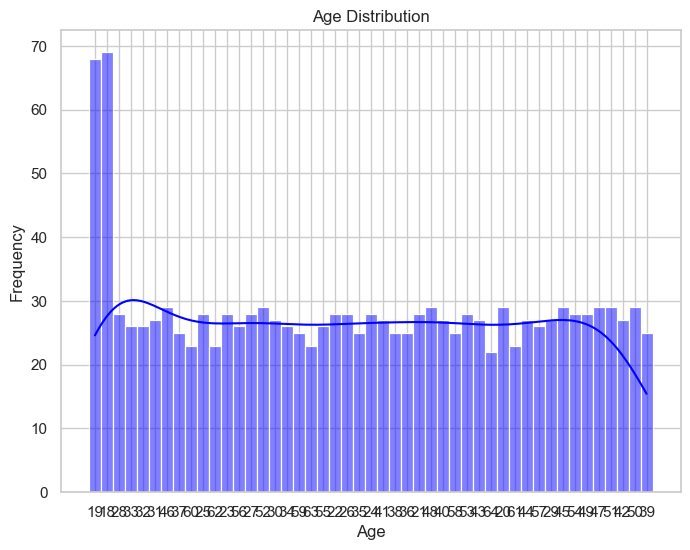

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Create a pandas DataFrame
df_ages = pd.DataFrame(ages, columns=['Age'])

# Set the style for the plot
sns.set(style="whitegrid")

# Create a histogram to visualize the age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df_ages['Age'], kde=True, bins=46, color='blue')

# Add labels and title
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()


What about the split between Gender?

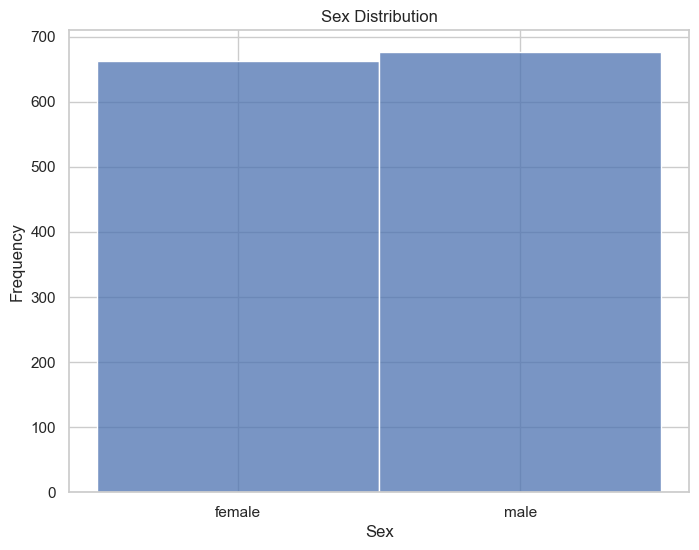

In [5]:
sexes = [row["sex"] for row in data]

# Create a pandas DataFrame
df_sexes = pd.DataFrame(sexes, columns=['Sex'])

# Set the style for the plot
sns.set(style="whitegrid")

# Create a histogram to visualize the age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df_sexes['Sex'])

# Add labels and title
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Frequency')

# Show the plot
plt.show()

And let's do regions next!

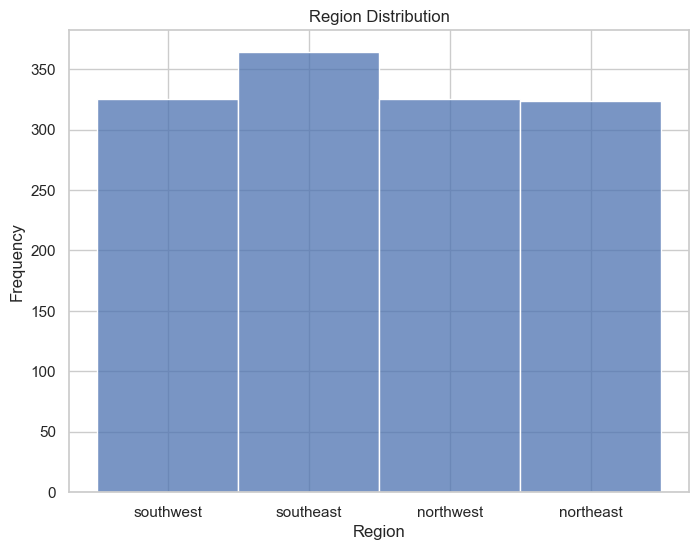

In [6]:
regions = [row["region"] for row in data]

# Create a pandas DataFrame
df_regions = pd.DataFrame(regions, columns=['Sex'])

# Set the style for the plot
sns.set(style="whitegrid")

# Create a histogram to visualize the age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df_regions['Sex'])

# Add labels and title
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Frequency')

# Show the plot
plt.show()

And BMI? Surely that might look like a normal distribution!

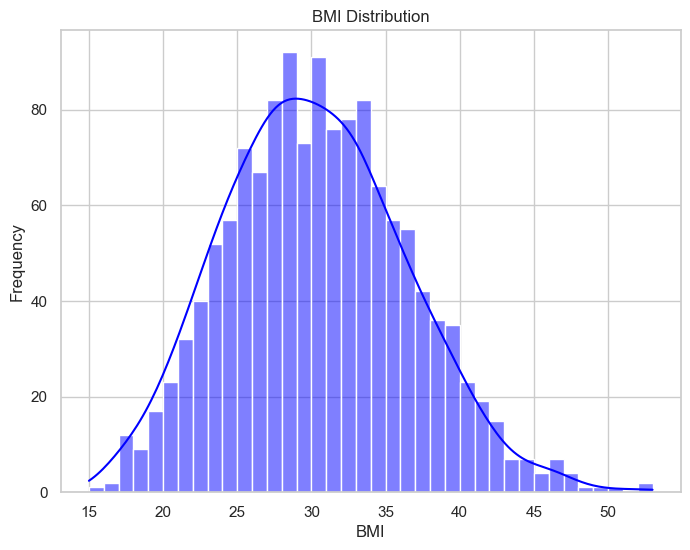

In [7]:
import math

floored_bmis = [math.floor(row) for row in bmis]

# Create a pandas DataFrame
df_bmis = pd.DataFrame(floored_bmis, columns=['BMI'])

# Set the style for the plot
sns.set(style="whitegrid")

# Create a histogram to visualize the age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df_bmis['BMI'],kde=True, bins=38, color='blue')

# Add labels and title
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')

# Show the plot
plt.show()

OK! Just three more columns left to visualize. How does the # of children look like?

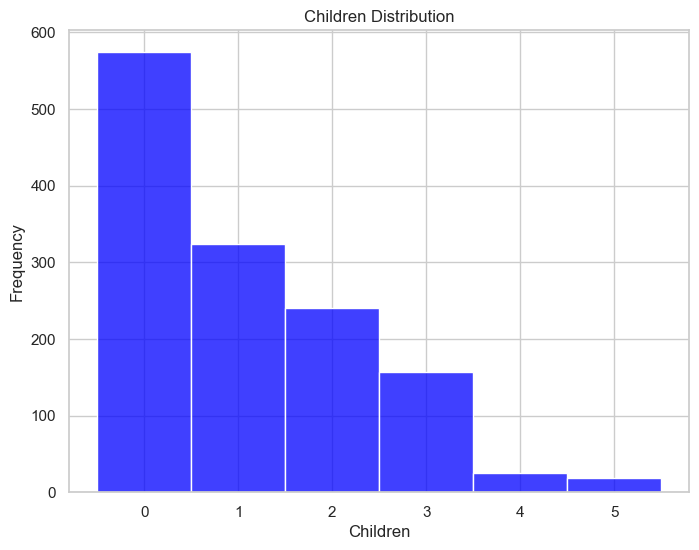

In [20]:
# Create a pandas DataFrame
df_children = pd.DataFrame(children, columns=['Children'])

# Set the style for the plot
sns.set(style="whitegrid")

# Create a histogram to visualize the age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df_children['Children'],kde=False, bins=6, color='blue')

# Add labels and title
plt.title('Children Distribution')
plt.xlabel('Children')
plt.ylabel('Frequency')

# Show the plot
plt.show()

We can see that just under have the respondents have 0 kids. And how are smokers distributed?

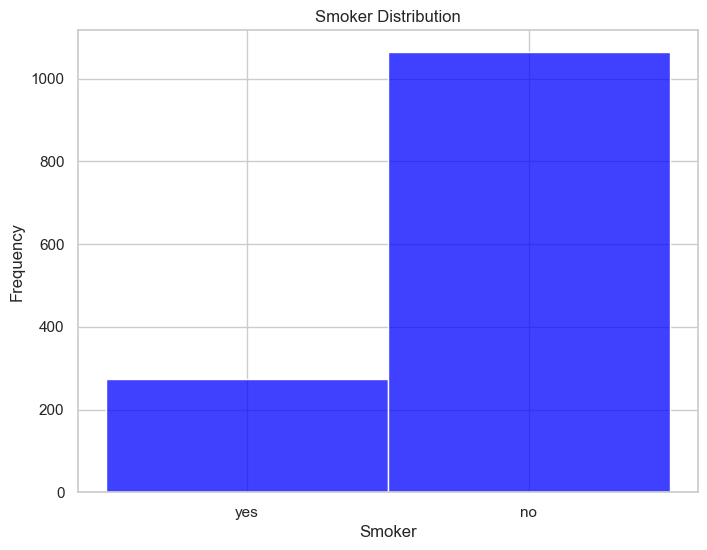

In [23]:
smokers = [row["smoker"] for row in data]

# Create a pandas DataFrame
df_smokers = pd.DataFrame(smokers, columns=['Smoker'])

# Set the style for the plot
sns.set(style="whitegrid")

# Create a histogram to visualize the age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df_smokers['Smoker'],kde=False, bins=2, color='blue')

# Add labels and title
plt.title('Smoker Distribution')
plt.xlabel('Smoker')
plt.ylabel('Frequency')

# Show the plot
plt.show()

Ok, so it's important to note that our dataset is MOSTLY non-smokers. Let's keep that in mind for any biases that might appear.

Last up is the costs! So we know that costs range from roughly 1100 to almost 64000 dollars. We'll want to bucket the costs, otherwise we'll have a frequency of 1 for probably every value, which won't tell us much. My gut says that bucketing all costs within 100$ of each other (roughly 53 buckets) should give us a nice visualization while still being hopefully meaningfull. Let's try it!

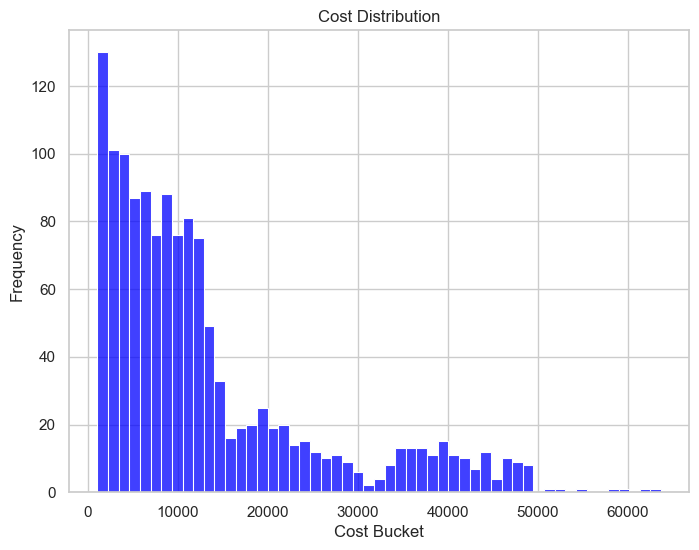

In [24]:
bucketed_costs = [(math.floor((cost/100))*100) for cost in costs]

# Create a pandas DataFrame
df_costs = pd.DataFrame(bucketed_costs, columns=['Cost'])

# Set the style for the plot
sns.set(style="whitegrid")

# Create a histogram to visualize the age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df_costs['Cost'],kde=False, bins=53, color='blue')

# Add labels and title
plt.title('Cost Distribution')
plt.xlabel('Cost Bucket')
plt.ylabel('Frequency')

# Show the plot
plt.show()

So we can see that the vast majority of the costs are under 14000$. Which, as a European, seems like a CRAZY amount to spend on health insurance.

So putting it all together, we know:

- Age is evenly distributed, with a slight bias towards 18 and 19 year olds
- Sex is evenly distributed
- BMI shows a normal distribution
- Almost half of the data set is from people without kids.
- Non-Smokers are over represented in the data set by a significant amount
- Region is evenly distributed
- Most costs are under $14000, with a long tail up to 63000

Now that we've gotten a pretty good handle on the data set, what are some interesting questions we might want to ask?

- How does each column correlate with the final cost?

Let's try to run some analysis and calculate the person correlation coefficient for each!

In [25]:
df = pd.DataFrame(data[1:], columns=data[0])
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
correlation_matrix = df_encoded.corr()
correlation_with_cost = correlation_matrix['charges'].drop('charges')
print(correlation_with_cost)

age                 0.299571
bmi                 0.198464
children            0.068224
sex_male            0.057542
smoker_yes          0.787983
region_northwest   -0.039784
region_southeast    0.074131
region_southwest   -0.043657
Name: charges, dtype: float64


Looking at the correlation, we can see that being a smoker has the strongest correlation with a coefficient of 0.78. If you're a smoker, that greatly increases your insurance costs to nobody's surprise.

Age and BMI also have weak correlations.

Surprisingly, children has almost no correlation, as do the various regions

So that makes me wonder, how accurately can I predict somebody's insurance costs using only their age and if they're a smoker?

In [30]:
smokers_numerical = [1 if row =="yes" else 0 for row in smokers]
print(smokers)
print(smokers_numerical)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.DataFrame(data[1:], columns=data[0])
df['smoker'] = df['smoker'].apply(lambda x:1 if x == 'yes' else 0)
X = df[['age', 'smoker']]
Y = df['charges']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# Print the model coefficients
print(f'Model Coefficients (age, smoker): {model.coef_}')
print(f'Intercept: {model.intercept_}')

['yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'no'

The R^2 is pretty good, meaning this model explains 72% of the variance in the cost of health insurance! However, the MSE is REALLY high, which is likely due to the wildly different insurance costs. These range from 1100 to 63000 in the data set. A $500 difference at a cost of 1100 is MASSIVE compared to at the 63000 range.